## Analizando el dataset

In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

In [8]:
dataset = R"D:\Documents\Trabajo terminal\TT2\Modelo\Datasets\Apparel-images-dataset"
classes = os.listdir(dataset)
classe_names = []
num_images = []

ct = 0
for classe in classes:
    classe_path = os.path.join(dataset,classe) #Ruta completa de la subcarpeta
    if os.path.isdir(classe_path):
        total = len(os.listdir(classe_path))
        print(f"La clase {classe} contiene {total} imagenes")
        classe_names.append(classe) #Guardar los nombres de las clases en una lista
        num_images.append(total) #Guardar el número de imágenes que hay en cada clase
        ct += total
tamanio_train = ct
num_classes = len(classes)
print("\nNumero de clases: " + str(num_classes))
print("\nTamaño del dataset: " + str(ct))

La clase black_dress contiene 450 imagenes
La clase black_pants contiene 871 imagenes
La clase black_shirt contiene 715 imagenes
La clase black_shoes contiene 766 imagenes
La clase black_shorts contiene 328 imagenes
La clase blue_dress contiene 502 imagenes
La clase blue_pants contiene 798 imagenes
La clase blue_shirt contiene 741 imagenes
La clase blue_shoes contiene 523 imagenes
La clase blue_shorts contiene 299 imagenes
La clase brown_pants contiene 311 imagenes
La clase brown_shoes contiene 464 imagenes
La clase brown_shorts contiene 40 imagenes
La clase green_pants contiene 227 imagenes
La clase green_shirt contiene 230 imagenes
La clase green_shoes contiene 455 imagenes
La clase green_shorts contiene 135 imagenes
La clase red_dress contiene 800 imagenes
La clase red_pants contiene 308 imagenes
La clase red_shoes contiene 610 imagenes
La clase white_dress contiene 818 imagenes
La clase white_pants contiene 274 imagenes
La clase white_shoes contiene 600 imagenes
La clase white_shor

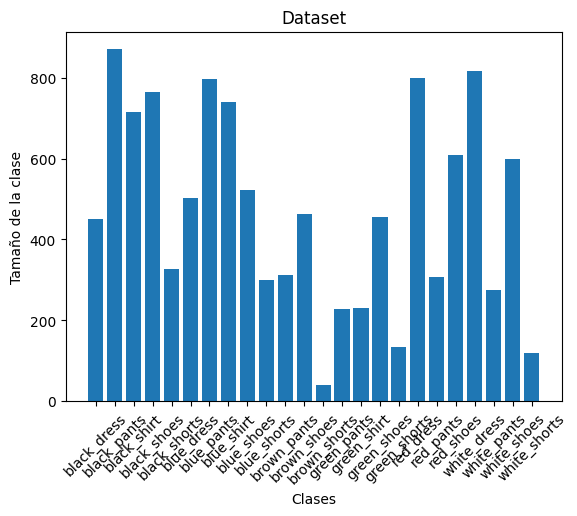

In [7]:
#Crear grafica de barras
plt.bar(classe_names,num_images)
plt.xlabel("Clases")
plt.ylabel("Tamaño de la clase")
plt.title("Dataset")
plt.xticks(rotation=45)

#Mostrar la grafica
plt.show()

### Mostrando algunas imágenes de cada clase

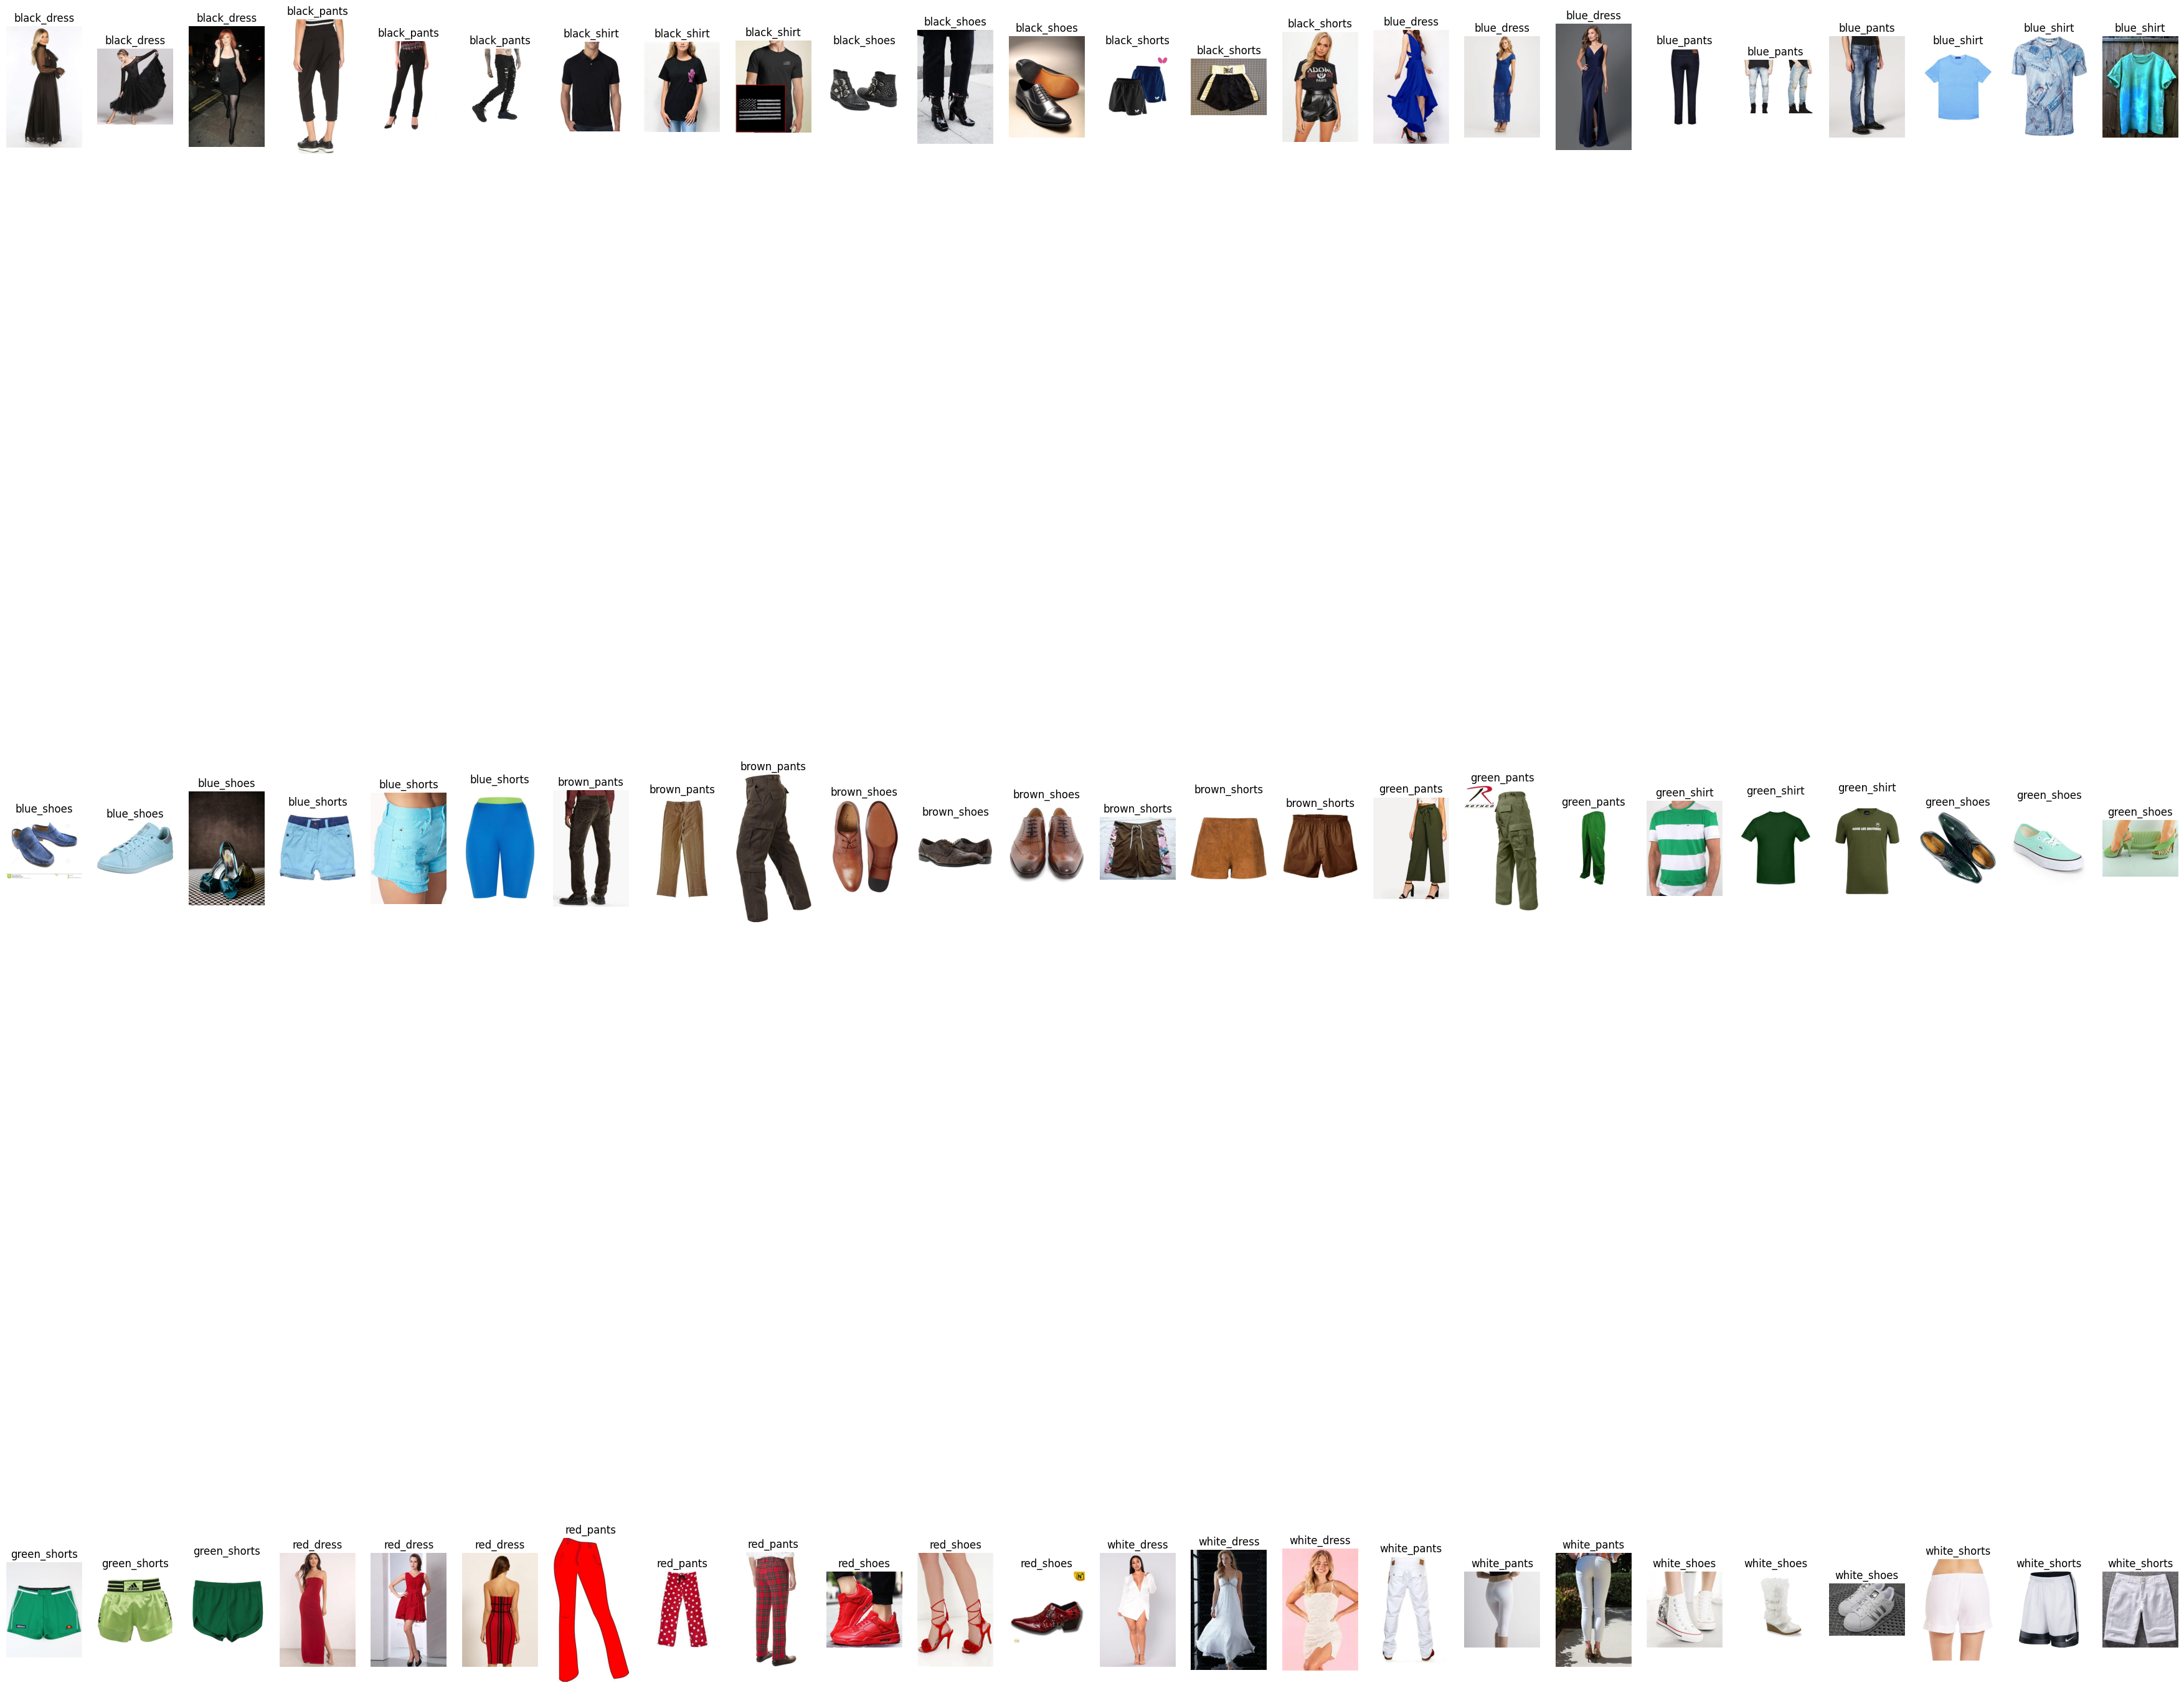

In [23]:
num_samples = 3 # numero de muestras por cada clase

plt.figure(figsize=(45, 45))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(dataset,class_name)
    sample_images = random.sample(os.listdir(class_dir), num_samples)
    

    for j, image_filename in enumerate(sample_images):
        image_path = os.path.join(class_dir, image_filename)
        image = Image.open(image_path)
        plt.subplot(num_samples, num_classes, i * num_samples + j + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(class_name)